In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [25]:
df=pd.read_csv('stud.csv')

In [26]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [27]:
x=df.drop(['math_score'],axis=1)

<p>Here , I have taken Math score as dependent variable and rest other variables as dependent variables</p>

In [28]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [29]:
y=df['math_score']

In [30]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [31]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

In [32]:
print(numerical_features)

['math_score', 'reading_score', 'writing_score']


In [33]:
print(categorical_features)

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


<b>Creating a Column Transformer<b>
<ul>
<li>For numerical features, apply Standardization</li>
<li>For categorical features, apply One Hot Encoding</li>
</ul>

In [39]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
numerical_features=x.select_dtypes(exclude='object').columns
categirical_features=x.select_dtypes(include='object').columns

numerical_transformer=StandardScaler()
categorical_transformer=OneHotEncoder()

ct=ColumnTransformer([('StandardScaler',numerical_transformer,numerical_features),('OneHotEncoder',categorical_transformer,categorical_features)])



In [35]:
print(numerical_features)

Index(['reading_score', 'writing_score'], dtype='object')


In [42]:
X=ct.fit_transform(x)

In [43]:
print(X)

[[ 0.19399858  0.39149181  1.         ...  1.          0.
   1.        ]
 [ 1.42747598  1.31326868  1.         ...  1.          1.
   0.        ]
 [ 1.77010859  1.64247471  1.         ...  1.          0.
   1.        ]
 ...
 [ 0.12547206 -0.20107904  1.         ...  0.          1.
   0.        ]
 [ 0.60515772  0.58901542  1.         ...  1.          1.
   0.        ]
 [ 1.15336989  1.18158627  1.         ...  0.          0.
   1.        ]]


In [44]:
X.shape

(1000, 19)

<b>Split the dataset into 80:20 ratio</b>


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
x_train.shape

(800, 19)

In [50]:
x_test.shape

(200, 19)

In [51]:
def evaulate_model(actual,predicted):
    mae=mean_absolute_error(actual,predicted)
    mse=mean_squared_error(actual,predicted)
    rms=np.sqrt(mse)
    r2_scre=r2_score(actual,predicted)
    return mae,mse,rms,r2_scre

In [53]:
models={'Linear Regression':LinearRegression(),'Lasso':Lasso(),'Ridge':Ridge(),'K-Neighbours Regressor':KNeighborsRegressor(),'Decision Tree Regressor':DecisionTreeRegressor(),'Reandom Forest Regressor':RandomForestRegressor(),'XGBRegressor':XGBRegressor(),'AdaBoostRegressor':AdaBoostRegressor(),'CatBoostRegressor':CatBoostRegressor()}

model_list=[]
r2_list=[]

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    mae_trained,mse_trained,rms_trained,r2_scre_trained=evaulate_model(y_train,y_train_pred)
    mae_test,mse_test,rms_test,r2_scre_test=evaulate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model result on training set")
    print(f"Mean Absolute Error for Training Dataset {mae_trained:.4f}")
    print(f"Mean Squared Error for Training Dataset {mse_trained:.4f}")
    print(f"Root Mean Squared Error for Training Dataset {rms_trained:.4f}")
    print(f"R2 Score for training Data: {r2_scre_trained:.4f}")

    print("-----------------------------------------------------------------------------")

    print("Model result on test set")
    print(f"Mean Absolute Error for test Dataset {mae_test:.4f}")
    print(f"Mean Squared Error for test Dataset {mse_test:.4f}")
    print(f"Root Mean Squared Error for test Dataset {rms_test:.4f}")
    print(f"R2 Score for test Data: {r2_scre_test:.4f}")

    r2_list.append(r2_scre_test)


    print("="*40)


Linear Regression
Model result on training set
Mean Absolute Error for Training Dataset 4.2667
Mean Squared Error for Training Dataset 28.3349
Root Mean Squared Error for Training Dataset 5.3231
R2 Score for training Data: 0.8743
-----------------------------------------------------------------------------
Model result on test set
Mean Absolute Error for test Dataset 4.2148
Mean Squared Error for test Dataset 29.0952
Root Mean Squared Error for test Dataset 5.3940
R2 Score for test Data: 0.8804
Lasso
Model result on training set
Mean Absolute Error for Training Dataset 5.2063
Mean Squared Error for Training Dataset 43.4783
Root Mean Squared Error for Training Dataset 6.5938
R2 Score for training Data: 0.8071
-----------------------------------------------------------------------------
Model result on test set
Mean Absolute Error for test Dataset 5.1579
Mean Squared Error for test Dataset 42.5063
Root Mean Squared Error for test Dataset 6.5197
R2 Score for test Data: 0.8253
Ridge
Model 

In [56]:
print(r2_list)
print(model_list)

[0.8804332983749565, 0.825320079562973, 0.880593148502874, 0.7837702557426202, 0.7522585831089544, 0.8543811309796472, 0.8212205171585083, 0.8443488830826787, 0.8516318920747058]
['Linear Regression', 'Lasso', 'Ridge', 'K-Neighbours Regressor', 'Decision Tree Regressor', 'Reandom Forest Regressor', 'XGBRegressor', 'AdaBoostRegressor', 'CatBoostRegressor']


In [57]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Reandom Forest Regressor,0.854381
8,CatBoostRegressor,0.851632
7,AdaBoostRegressor,0.844349
1,Lasso,0.825320
6,XGBRegressor,0.821221
3,K-Neighbours Regressor,0.783770
4,Decision Tree Regressor,0.752259


In [59]:
ridge_model=Ridge()
ridge_model.fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)
ridge_r2_score=r2_score(y_test,y_pred)*100
print(f"Accuracy of the model is {ridge_r2_score:.2f}%")

Accuracy of the model is 88.06%


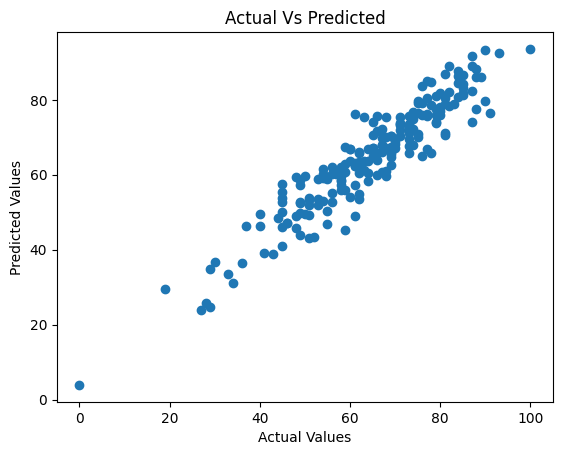

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Vs Predicted")
plt.show()

<Axes: xlabel='math_score'>

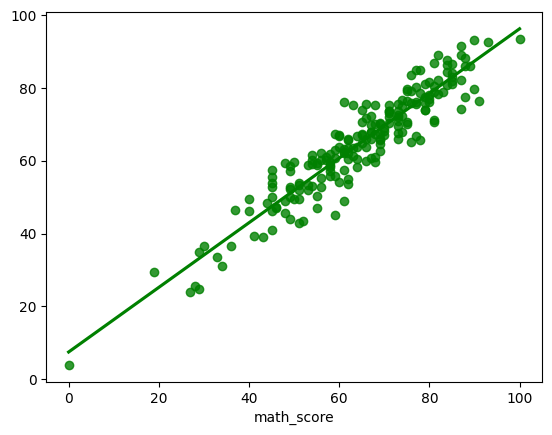

In [62]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='green')

In [63]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':abs(y_test-y_pred)})

,Actual,Predicted,Difference
521,91,76.398705,14.601295
737,53,58.842469,5.842469
740,80,76.992129,3.007871
660,74,76.805898,2.805898
411,84,87.615387,3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,0.170763
208,74,67.910325,6.089675
613,65,67.061504,2.061504
